# M7 T01: Pipelines, grid search i text mining

Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics

Recursos de l'aula i https://www.nltk.org

## Nivell 1 - Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

_Treballarem amb el dataset **temps**, que hem vist anteriorment en el tutorial de Random Forest. Per llegir les dades necessitem la llibreria **panda**, aprofitem per carregar altres llibreries que necessitarem més endevant_

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
features = pd.read_csv('./../data/temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


_Creem els subconjunt de dades X e Y. **actual** serà la nostra variable Y. La resta de variables quantitatives seran les variables X_

In [3]:
Y = np.array(features['actual'])

In [4]:
Y.shape

(348,)

In [5]:
X = features.drop(['actual','year','month','day','week'], axis = 1)

In [6]:
X.shape

(348, 7)

_Creem el pipeline_

In [7]:
pipe = Pipeline([('scaler', StandardScaler()),('rf',RandomForestRegressor())])

_Identifiquem els paràmetres que farem servir en el model_

In [8]:
param = {
    'rf__n_estimators': [100,200,500],
    'rf__max_depth': [15,20,25]
}

_Ajustem el model_

In [9]:
rf_gs = GridSearchCV(pipe,param_grid=param,cv=5)
rf_gs.fit(X,Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [15, 20, 25],
                         'rf__n_estimators': [100, 200, 500]})

## Nivell 1 - Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

_Carreguem les "llibreries" corresponents_

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

_Introduim un text en anglès_

In [8]:
#text = "The coronavirus is spread through the air, especially in indoor spaces. While it is not as infectious as measles, scientists now openly acknowledge the role played by the transmission of aerosols – tiny contagious particles exhaled by an infected person that remain suspended in the air of an indoor environment. How does the transmission work? And, more importantly, how can we stop it?"

In [12]:
text = "Why data visualization is important for any career. It’s hard to think of a professional industry that doesn’t benefit from making data more understandable. Every STEM field benefits from understanding data—and so do fields in government, finance, marketing, history, consumer goods, service industries, education, sports, and so on. While we’ll always wax poetically about data visualization (you’re on the Tableau website, after all) there are practical, real-life applications that are undeniable. And, since visualization is so prolific, it’s also one of the most useful professional skills to develop. The better you can convey your points visually, whether in a dashboard or a slide deck, the better you can leverage that information. The concept of the citizen data scientist is on the rise. Skill sets are changing to accommodate a data-driven world. It is increasingly valuable for professionals to be able to use data to make decisions and use visuals to tell stories of when data informs the who, what, when, where, and how. While traditional education typically draws a distinct line between creative storytelling and technical analysis, the modern professional world also values those who can cross between the two: data visualization sits right in the middle of analysis and visual storytelling."

_"Identifiquem" les diferents paraules del text introduit_

In [13]:
tokenized_word=word_tokenize(text)

_Calculem la distribució de les diferents paraules_

In [14]:
fdist = FreqDist(tokenized_word)

In [15]:
print(fdist)

<FreqDist with 143 samples and 244 outcomes>


_Per cada paraula, mirem la freqüència. I fem el gràfic de les paraules més freqüents_

In [16]:
for key,val in fdist.items():
    print (str(key) + ':' + str(val))

Why:1
data:7
visualization:4
is:4
important:1
for:2
any:1
career:1
.:10
It:2
’:5
s:2
hard:1
to:7
think:1
of:5
a:5
professional:3
industry:1
that:3
doesn:1
t:1
benefit:1
from:2
making:1
more:1
understandable:1
Every:1
STEM:1
field:1
benefits:1
understanding:1
data—and:1
so:3
do:1
fields:1
in:3
government:1
,:19
finance:1
marketing:1
history:1
consumer:1
goods:1
service:1
industries:1
education:2
sports:1
and:5
on:3
While:2
we:1
ll:1
always:1
wax:1
poetically:1
about:1
(:1
you:3
re:1
the:9
Tableau:1
website:1
after:1
all:1
):1
there:1
are:3
practical:1
real-life:1
applications:1
undeniable:1
And:1
since:1
prolific:1
it:1
also:2
one:1
most:1
useful:1
skills:1
develop:1
The:2
better:2
can:3
convey:1
your:1
points:1
visually:1
whether:1
dashboard:1
or:1
slide:1
deck:1
leverage:1
information:1
concept:1
citizen:1
scientist:1
rise:1
Skill:1
sets:1
changing:1
accommodate:1
data-driven:1
world:2
increasingly:1
valuable:1
professionals:1
be:1
able:1
use:2
make:1
decisions:1
visuals:1
tell:1
stor

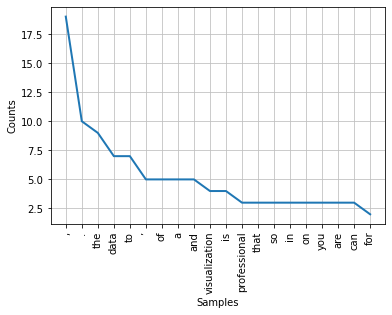

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
fdist.plot(20, cumulative=False)

## Nivell 2 - Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

_Carreguem els stopwords_

In [18]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


_Filtrem les dades segons els valors stopwords_

In [19]:
filtered_sent=[]

for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

In [20]:
print("Tokenized Sentence:",tokenized_word)

Tokenized Sentence: ['Why', 'data', 'visualization', 'is', 'important', 'for', 'any', 'career', '.', 'It', '’', 's', 'hard', 'to', 'think', 'of', 'a', 'professional', 'industry', 'that', 'doesn', '’', 't', 'benefit', 'from', 'making', 'data', 'more', 'understandable', '.', 'Every', 'STEM', 'field', 'benefits', 'from', 'understanding', 'data—and', 'so', 'do', 'fields', 'in', 'government', ',', 'finance', ',', 'marketing', ',', 'history', ',', 'consumer', 'goods', ',', 'service', 'industries', ',', 'education', ',', 'sports', ',', 'and', 'so', 'on', '.', 'While', 'we', '’', 'll', 'always', 'wax', 'poetically', 'about', 'data', 'visualization', '(', 'you', '’', 're', 'on', 'the', 'Tableau', 'website', ',', 'after', 'all', ')', 'there', 'are', 'practical', ',', 'real-life', 'applications', 'that', 'are', 'undeniable', '.', 'And', ',', 'since', 'visualization', 'is', 'so', 'prolific', ',', 'it', '’', 's', 'also', 'one', 'of', 'the', 'most', 'useful', 'professional', 'skills', 'to', 'develop

In [21]:
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['Why', 'data', 'visualization', 'important', 'career', '.', 'It', '’', 'hard', 'think', 'professional', 'industry', '’', 'benefit', 'making', 'data', 'understandable', '.', 'Every', 'STEM', 'field', 'benefits', 'understanding', 'data—and', 'fields', 'government', ',', 'finance', ',', 'marketing', ',', 'history', ',', 'consumer', 'goods', ',', 'service', 'industries', ',', 'education', ',', 'sports', ',', '.', 'While', '’', 'always', 'wax', 'poetically', 'data', 'visualization', '(', '’', 'Tableau', 'website', ',', ')', 'practical', ',', 'real-life', 'applications', 'undeniable', '.', 'And', ',', 'since', 'visualization', 'prolific', ',', '’', 'also', 'one', 'useful', 'professional', 'skills', 'develop', '.', 'The', 'better', 'convey', 'points', 'visually', ',', 'whether', 'dashboard', 'slide', 'deck', ',', 'better', 'leverage', 'information', '.', 'The', 'concept', 'citizen', 'data', 'scientist', 'rise', '.', 'Skill', 'sets', 'changing', 'accommodate', 'data-driven',

_Apliquem stemming, normalitzem les diferents paraules (ens quedem amb la seva arrel). Primer de tot carreguem les llibreries_

In [22]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [23]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

In [24]:
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['whi', 'data', 'visual', 'import', 'career', '.', 'it', '’', 'hard', 'think', 'profession', 'industri', '’', 'benefit', 'make', 'data', 'understand', '.', 'everi', 'stem', 'field', 'benefit', 'understand', 'data—and', 'field', 'govern', ',', 'financ', ',', 'market', ',', 'histori', ',', 'consum', 'good', ',', 'servic', 'industri', ',', 'educ', ',', 'sport', ',', '.', 'while', '’', 'alway', 'wax', 'poetic', 'data', 'visual', '(', '’', 'tableau', 'websit', ',', ')', 'practic', ',', 'real-lif', 'applic', 'undeni', '.', 'and', ',', 'sinc', 'visual', 'prolif', ',', '’', 'also', 'one', 'use', 'profession', 'skill', 'develop', '.', 'the', 'better', 'convey', 'point', 'visual', ',', 'whether', 'dashboard', 'slide', 'deck', ',', 'better', 'leverag', 'inform', '.', 'the', 'concept', 'citizen', 'data', 'scientist', 'rise', '.', 'skill', 'set', 'chang', 'accommod', 'data-driven', 'world', '.', 'it', 'increasingli', 'valuabl', 'profession', 'abl', 'use', 'data', 'make', 'decis', 

## Nivell 3 - Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

_Dividim el text original en frases_

In [28]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(text)

In [29]:
print(sentences)

['Why data visualization is important for any career.', 'It’s hard to think of a professional industry that doesn’t benefit from making data more understandable.', 'Every STEM field benefits from understanding data—and so do fields in government, finance, marketing, history, consumer goods, service industries, education, sports, and so on.', 'While we’ll always wax poetically about data visualization (you’re on the Tableau website, after all) there are practical, real-life applications that are undeniable.', 'And, since visualization is so prolific, it’s also one of the most useful professional skills to develop.', 'The better you can convey your points visually, whether in a dashboard or a slide deck, the better you can leverage that information.', 'The concept of the citizen data scientist is on the rise.', 'Skill sets are changing to accommodate a data-driven world.', 'It is increasingly valuable for professionals to be able to use data to make decisions and use visuals to tell stor

_Analitzem el sentiment, carreguem les llibreries_

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment

_Creem analitzador de sentiments:_

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
analizador = SentimentIntensityAnalyzer()

_Fem anàlisi de sentiments per cadascuna de les frases_

In [30]:
for sentence in sentences:
    print(sentence)
    scores = analizador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()

Why data visualization is important for any career.
neg :  0.0

neu :  0.795

pos :  0.205

compound :  0.2023

It’s hard to think of a professional industry that doesn’t benefit from making data more understandable.
neg :  0.08

neu :  0.747

pos :  0.172

compound :  0.3818

Every STEM field benefits from understanding data—and so do fields in government, finance, marketing, history, consumer goods, service industries, education, sports, and so on.
neg :  0.0

neu :  0.898

pos :  0.102

compound :  0.3818

While we’ll always wax poetically about data visualization (you’re on the Tableau website, after all) there are practical, real-life applications that are undeniable.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

And, since visualization is so prolific, it’s also one of the most useful professional skills to develop.
neg :  0.0

neu :  0.834

pos :  0.166

compound :  0.4927

The better you can convey your points visually, whether in a dashboard or a slide deck, the better 

_Per a cadascuna de les frases del nostre text ens surt la valoració (de 0 a 1) de com de negativa (neg), neutral (neu) o positiva (pos) seria la frase. Totes les frases serien neutrals o positives_

_El concepte compound (entre -1 y 1) indica d'una única vegada si la frase es positiva o negativa. Valors propers a -1 indiquen que és molt negativa, valors propers a próximos a zero indiquen que és neutra i valors propers a 1 seria molt positiva. Com ja hem dit abans, no tenin cap frase negativa, algunes totalment neutrals (valor de 0) i d'altres positives. Com per exemple, les dos darreres frases, que serien positives_

**Font:** https://www.arsys.es/blog/analisis-sentimientos-python-jupyter-notebooks/